# IPL Case Study - Principal Component Analysis

Use Principal Component Analysis to rank Batsmen and Bowlers for the 2012 Indian Premier League Cricket Tournament. In this case study we will be using two different datasets:

- batting_bowling_ipl_bat.csv
- batting_bowling_ipl_bowl.csv

# Import Libraries

In this step all the libraries that are required to manipulate the data and to run PCA will be loaded. 

In [30]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


First, we will analyse the batting dataset and then later we will use the bowling dataset in this casestudy.

# Batting Analysis

# Load the batting Data file into Python DataFrame and view top 5 rows

In [31]:
bat_df=pd.read_csv('C:\\Users\\jayveer\\Downloads\\IPL Case-study\\batting_bowling_ipl_bat.csv')

Check Top 5 rows

In [32]:
bat_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733,61.08,160.74,46,59,9
1,G Gambhir,590,36.87,143.55,64,17,6
2,V Sehwag,495,33.00,161.23,57,19,5
3,CL White,479,43.54,149.68,41,20,5
4,S Dhawan,569,40.64,129.61,58,18,5


- Name column is to identify the player and hence can be skipped in analysis
- All columns except Names have numerical values.

# Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis.

In [33]:
bat_df.shape

(90, 7)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The batting data set has 90 observations and 7 variables in the data set.

In [34]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
Name     90 non-null object
Runs     90 non-null int64
Ave      90 non-null float64
SR       90 non-null float64
Fours    90 non-null int64
Sixes    90 non-null int64
HF       90 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.0+ KB


info() is used to check the Information about the data and the datatypes of each respective attributes.

In [35]:
bat_df.dtypes

Name      object
Runs       int64
Ave      float64
SR       float64
Fours      int64
Sixes      int64
HF         int64
dtype: object

In [36]:
bat_df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [37]:
# Check for missing value in any other column
bat_df.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

There are no missing values in any column in the data set.

In [38]:
# Check for duplicate data

dups = bat_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

bat_df[dups]

Number of duplicate rows = 0


,Name,Runs,Ave,SR,Fours,Sixes,HF


There are no duplicate rows in the data set.

# Perform bi variate analysis including correlation, heatmap and state the inferences.

In [39]:
# Check for correlation of variable
bat_df.corr(method='pearson')

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


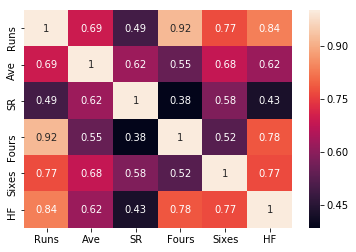

In [40]:
sns.heatmap(bat_df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

Looking at the correlation table and heatmap graph above, we can clearly say that:
    
- Runs and Fours are highly correlated.
- Runs and HF are also correlated.
- Runs and Sixes shows some correlation as well.
- HF and Fours and HF and Sixes show some correlation. 

# Prepare dataset for PCA

Since Name is an object datatype and will not make any sense so we will remove it from PCA.

In [41]:
bat_PCA=bat_df.drop(['Name'], axis =1)
bat_PCA.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,733,61.08,160.74,46,59,9
1,590,36.87,143.55,64,17,6
2,495,33.00,161.23,57,19,5
3,479,43.54,149.68,41,20,5
4,569,40.64,129.61,58,18,5


In [42]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
bat_PCA=bat_PCA.apply(zscore)
bat_PCA.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
1,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
2,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
3,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
4,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


# Create a covariance matrix for identifying Principal components

In [43]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(bat_PCA.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


# Identify eigen values and eigen vector

In [44]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


An Eigen value is a number, telling us how much variance there is in the data in the direction of the Eigen vector. When Eigen value is 0, there is no variation at all.


# Find variance and cumulative variance by each eigen vector

In [45]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.91199612  84.696562    91.56369501  96.98815324  99.71877694
 100.        ]


# Scree Plot

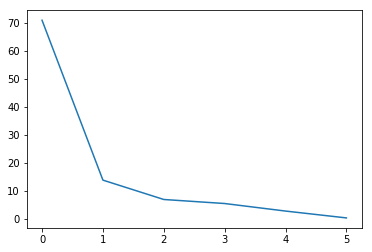

In [46]:
plt.plot(var_exp)

Visually we can observe that their is steep drop in variance explained with increase in number of PC's. In the above scree plot:

•	70.91 % of the total variation is explained by first Principal Component and confirmed by screeplot.
•	In the scree plot, the last big drop occurs between the first and second components and we choose the first component.


# Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [47]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 1 PCA dimensions (dimensionality reduction from 6 to 2)

pca = PCA(n_components=1)
data_reduced = pca.fit_transform(bat_PCA)
data_reduced.transpose()

array([[ 8.51677407,  4.61833957,  4.1422505 ,  3.89941107,  4.12007165,
         4.02443639,  2.87928084,  2.91901518,  2.3273886 ,  2.08164241,
         2.08328069,  1.77694308,  2.12516667,  1.93887249,  1.72763623,
         1.81713174,  1.86989515,  1.44931719,  1.7957849 ,  1.83452229,
         0.68521512,  1.28111282,  1.23672458,  1.03374737,  1.38634619,
         1.18109656,  0.68373376,  1.04356191,  1.02916835,  0.53160014,
         0.87997561,  0.66964957,  1.09641905,  0.86013096,  0.32393465,
         0.46475228,  0.25917713,  0.24998938, -0.20115976, -0.04807084,
         0.0883086 , -0.36664347, -0.35836507, -0.56106199, -0.38633634,
        -0.8044013 , -0.28948789, -0.83938715, -0.54299019, -0.79645257,
        -0.72628805, -0.64359706, -0.54259693, -0.60228889, -0.79720994,
        -1.05373734, -0.75723616, -0.58311079, -0.70861363, -0.8205596 ,
        -0.58026028, -0.87356201, -1.17539392, -1.27968755, -1.44935985,
        -1.27340186, -1.35120355, -1.41775582, -1.4

# Applying Ranks over batting data

In [48]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var

array([0.70911996])

In [49]:
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(bat_PCA),columns = bat_PCA.columns) 

# PCA
pca = PCA(n_components=1)
pca.fit_transform(data_scaled)

# Dump components relations with features:
#print (pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1']))
df_PC =pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1'])

In [50]:
series1=df_PC.iloc[0]
series1

Runs     0.458261
Ave      0.397973
SR       0.325384
Fours    0.405742
Sixes    0.417335
HF       0.432372
Name: PC-1, dtype: float64

In [51]:
func2 = lambda x: np.asarray(x) * np.asarray(series1)

In [52]:
bat_PCA1=data_scaled.apply(func2, axis=1)

In [53]:
bat_df['batting_score']=bat_PCA1.sum(axis = 1, skipna = True) 

In [54]:
bat_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,batting_score
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251
3,CL White,479,43.54,149.68,41,20,5,3.899411
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072


In [55]:
bat_df.sort_values(by='batting_score',ascending = False).head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,batting_score
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072
5,AM Rahane,560,40.00,129.33,73,10,5,4.024436
3,CL White,479,43.54,149.68,41,20,5,3.899411
7,RG Sharma,433,30.92,126.60,39,18,5,2.919015
6,KP Pietersen,305,61.00,147.34,22,20,3,2.879281
8,AB de Villiers,319,39.87,161.11,26,15,3,2.327389
12,F du Plessis,398,33.16,130.92,29,17,3,2.125167


In [90]:
bat_df['Rank']=bat_df['batting_score'].rank(ascending=False)

In [94]:
bat_df.sort_values(by='Rank')

,Name,Runs,Ave,SR,Fours,Sixes,HF,batting_score,Rank
0,CH Gayle,733,61.08,160.74,46,59,9,8.516774,1.0
1,G Gambhir,590,36.87,143.55,64,17,6,4.618340,2.0
2,V Sehwag,495,33.00,161.23,57,19,5,4.142251,3.0
4,S Dhawan,569,40.64,129.61,58,18,5,4.120072,4.0
5,AM Rahane,560,40.00,129.33,73,10,5,4.024436,5.0
3,CL White,479,43.54,149.68,41,20,5,3.899411,6.0
7,RG Sharma,433,30.92,126.60,39,18,5,2.919015,7.0
6,KP Pietersen,305,61.00,147.34,22,20,3,2.879281,8.0
8,AB de Villiers,319,39.87,161.11,26,15,3,2.327389,9.0
12,F du Plessis,398,33.16,130.92,29,17,3,2.125167,10.0


# Bowling Analysis

# Load the bowling Data file into Python DataFrame and view top 5 rows

In [57]:
bowl_df=pd.read_csv('C:\\Users\\jayveer\\Downloads\\IPL Case-study\\batting_bowling_ipl_bowl.csv')

Check Top 5 rows

In [58]:
bowl_df.head()

,Name,Wkts,Ave,Econ,SR
0,R Ashwin,14,30.78,6.54,28.2
1,P Kumar,9,48.22,6.88,42.0
2,M Morkel,25,18.12,7.19,15.1
3,UT Yadav,19,23.84,7.42,19.2
4,Z Khan,17,26.64,7.55,21.1


- Name column is to identify the player and hence can be skipped in analysis
- All columns except Names have numerical values.

# Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis.

In [59]:
bowl_df.shape

(83, 5)

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The bowling data set has 83 observations and 5 variables in the data set.

In [60]:
bowl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
Name    83 non-null object
Wkts    83 non-null int64
Ave     83 non-null float64
Econ    83 non-null float64
SR      83 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ KB


In [61]:
bowl_df.dtypes

Name     object
Wkts      int64
Ave     float64
Econ    float64
SR      float64
dtype: object

In [62]:
bowl_df.describe()

,Wkts,Ave,Econ,SR
count,83.000000,83.000000,83.000000,83.000000
mean,8.879518,34.505663,7.655542,26.332530
std,5.491451,23.677252,1.104584,14.422891
min,1.000000,12.200000,5.400000,12.000000
25%,5.000000,22.315000,6.950000,17.250000
50%,8.000000,29.000000,7.530000,21.600000
75%,12.500000,36.435000,8.280000,28.900000
max,25.000000,161.000000,11.650000,96.000000


The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

# Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [63]:
# Check for missing value in any other column
bowl_df.isnull().sum()

Name    0
Wkts    0
Ave     0
Econ    0
SR      0
dtype: int64

There are no missing values in any column in the data set.

In [64]:
# Check for duplicate data

dups = bowl_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

bowl_df[dups]

Number of duplicate rows = 0


,Name,Wkts,Ave,Econ,SR


There are no duplicate rows in the data set.

# Perform bi variate analysis including correlation, heatmap and state the inferences.

In [65]:
# Check for correlation of variable
bowl_df.corr(method='pearson')

,Wkts,Ave,Econ,SR
Wkts,1.000000,-0.490534,-0.292454,-0.512344
Ave,-0.490534,1.000000,0.522617,0.963098
Econ,-0.292454,0.522617,1.000000,0.327737
SR,-0.512344,0.963098,0.327737,1.000000


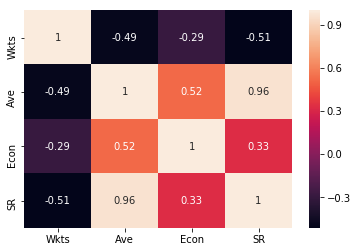

In [66]:
sns.heatmap(bowl_df.corr(), annot=True)

Looking at the correlation table and heatmap graph above, we can clearly say that:
    
- Ave and SR are highly correlated.

# Prepare dataset for PCA

Since Name is an object datatype and will not make any sense so we will remove it from PCA.


In [67]:
bowl_PCA=bowl_df.drop(['Name'], axis =1)
bowl_PCA.head()

,Wkts,Ave,Econ,SR
0,14,30.78,6.54,28.2
1,9,48.22,6.88,42.0
2,25,18.12,7.19,15.1
3,19,23.84,7.42,19.2
4,17,26.64,7.55,21.1


In [68]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
bowl_PCA=bowl_PCA.apply(zscore)
bowl_PCA.head()

,Wkts,Ave,Econ,SR
0,0.938114,-0.158309,-1.016060,0.130267
1,0.022073,0.582741,-0.706381,1.092896
2,2.953405,-0.696249,-0.424026,-0.783533
3,1.854156,-0.453199,-0.214537,-0.497535
4,1.487739,-0.334223,-0.096130,-0.364999


# Create a covariance matrix for identifying Principal components

In [69]:
# PCA
# Step 1 - Create covariance matrix

cov_matrixbowl = np.cov(bowl_PCA.T)
print('Covariance Matrix \n%s', cov_matrixbowl)

Covariance Matrix 
%s [[ 1.01219512 -0.49651581 -0.29602051 -0.51859185]
 [-0.49651581  1.01219512  0.52899062  0.97484351]
 [-0.29602051  0.52899062  1.01219512  0.33173423]
 [-0.51859185  0.97484351  0.33173423  1.01219512]]


# Identify eigen values and eigen vector

In [70]:
eig_vals_bowl, eig_vecs_bowl = np.linalg.eig(cov_matrixbowl)
print('Eigen Vectors \n%s', eig_vecs_bowl)
print('\n Eigen Values \n%s', eig_vals_bowl)

Eigen Vectors 
%s [[ 0.42820758 -0.83847195 -0.33487615  0.03822333]
 [-0.59116833 -0.35390517  0.04764188 -0.72318835]
 [-0.38341538  0.168154   -0.89162604  0.17239454]
 [-0.5658188  -0.37873493  0.30098375  0.66769582]]

 Eigen Values 
%s [2.64797247 0.62774419 0.76076805 0.01229579]


# Find variance and cumulative variance by each eigen vector

In [71]:
tot = sum(eig_vals_bowl)
var_exp_bowl = [( i /tot ) * 100 for i in sorted(eig_vals_bowl, reverse=True)]
cum_var_exp_bowl = np.cumsum(var_exp_bowl)
print("Cumulative Variance Explained", cum_var_exp_bowl)

Cumulative Variance Explained [ 65.40172957  84.19178372  99.69630886 100.        ]


# Scree Plot

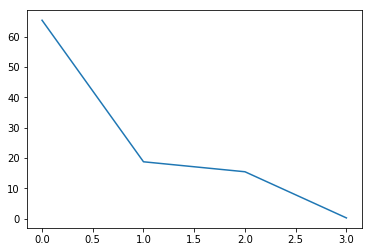

In [72]:
plt.plot(var_exp_bowl)

Visually we can observe that their is steep drop in variance explained with increase in number of PC's. In the above scree plot:

65.40 % of the total variation is explained by first Principal Component and confirmed by screeplot. • In the scree plot, the last big drop occurs between the first and second components and we choose the first component.

# Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [73]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 1 PCA dimensions (dimensionality reduction from 6 to 2)

pca1 = PCA(n_components=1)
data_reduced_bowl = pca1.fit_transform(bowl_PCA)
data_reduced_bowl.transpose()

array([[-8.11160444e-01,  6.82589766e-01, -2.28218685e+00,
        -1.42565146e+00, -1.07802412e+00,  1.43195592e+00,
        -2.93623941e+00, -5.80990548e-01, -1.07307876e+00,
        -1.04454122e+00, -2.41340736e+00,  1.86828030e+00,
        -9.27291042e-01, -6.31445980e-01, -6.72005254e-01,
        -5.45687881e-01,  1.25074828e-01, -1.25343073e+00,
        -5.21067951e-01, -9.66296027e-01, -2.15541811e+00,
         2.83544931e-01, -1.15473207e+00, -9.80130753e-01,
        -1.54205287e-01,  2.86324338e-01,  3.32299253e-01,
        -1.91262686e-01, -1.72296153e+00,  3.85216837e-02,
         6.68365535e-01,  4.78494723e-02, -7.27879956e-01,
         2.18227173e+00, -8.38266407e-01,  9.06380586e-01,
        -1.59881843e+00, -8.05339711e-02,  1.85430134e-01,
         3.08111233e-01, -1.84702365e+00, -6.25923017e-01,
        -1.55420630e+00, -3.54117536e-01,  3.52022534e-01,
        -5.75491228e-01,  2.84792774e-02, -2.89871268e-01,
         6.49888068e-01, -1.13018064e+00, -1.02750199e+0

# Apply Ranks based on bowling score

In [75]:
#The amount of variance that each PC explains
var= pca1.explained_variance_ratio_
var

array([0.6540173])

In [76]:
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(bowl_PCA),columns = bowl_PCA.columns) 

# PCA
pca = PCA(n_components=1)
pca.fit_transform(data_scaled)

# Dump components relations with features:
#print (pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1']))
df_PC =pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1'])

In [77]:
series1=df_PC.iloc[0]
series1

Wkts   -0.428208
Ave     0.591168
Econ    0.383415
SR      0.565819
Name: PC-1, dtype: float64

In [78]:

#ser2 = pd.Series(np.array([-0.428208,0.591168,0.383415,0.565819]))
#ser2
print(type(series1))

<class 'pandas.core.series.Series'>


In [79]:
func2 = lambda x: np.asarray(x) * np.asarray(series1)

In [81]:
bowl_PCA1=data_scaled.apply(func2, axis=1)

In [82]:
bowl_PCA1.head()

,Wkts,Ave,Econ,SR
0,-0.401708,-0.093587,-0.389573,0.073707
1,-0.009452,0.344498,-0.270837,0.618381
2,-1.264670,-0.411601,-0.162578,-0.443338
3,-0.793963,-0.267917,-0.082257,-0.281515
4,-0.637061,-0.197582,-0.036858,-0.206523


In [83]:
bowl_df['bowling_score']=bowl_PCA1.sum(axis = 1, skipna = True) 

In [84]:
bowl_df.head()

,Name,Wkts,Ave,Econ,SR,bowling_score
0,R Ashwin,14,30.78,6.54,28.2,-0.811160
1,P Kumar,9,48.22,6.88,42.0,0.682590
2,M Morkel,25,18.12,7.19,15.1,-2.282187
3,UT Yadav,19,23.84,7.42,19.2,-1.425651
4,Z Khan,17,26.64,7.55,21.1,-1.078024


In [85]:
bowl_df.sort_values(by='bowling_score',ascending = False).head(10)

,Name,Wkts,Ave,Econ,SR,bowling_score
65,AD Russell,1,161.00,10.06,96.0,7.385043
75,TP Sudhindra,1,136.00,11.65,70.0,6.286123
73,JP Duminy,1,104.00,8.66,72.0,4.517058
51,MS Gony,3,69.00,8.62,48.0,2.519744
63,BA Bhatt,2,68.00,8.24,49.5,2.499574
33,M Kartik,4,66.50,7.38,54.0,2.182272
57,YK Pathan,3,60.66,8.27,44.0,2.030142
11,Harbhajan Singh,6,64.00,7.11,54.0,1.868280
79,SC Ganguly,2,47.50,9.50,30.0,1.654997
70,SK Raina,2,52.50,7.50,42.0,1.555778


In [92]:
bowl_df['Rank']=bowl_df['bowling_score'].rank(ascending=False)

In [93]:
bowl_df.sort_values(by='Rank')

,Name,Wkts,Ave,Econ,SR,bowling_score,Rank
65,AD Russell,1,161.00,10.06,96.0,7.385043,1.0
75,TP Sudhindra,1,136.00,11.65,70.0,6.286123,2.0
73,JP Duminy,1,104.00,8.66,72.0,4.517058,3.0
51,MS Gony,3,69.00,8.62,48.0,2.519744,4.0
63,BA Bhatt,2,68.00,8.24,49.5,2.499574,5.0
33,M Kartik,4,66.50,7.38,54.0,2.182272,6.0
57,YK Pathan,3,60.66,8.27,44.0,2.030142,7.0
11,Harbhajan Singh,6,64.00,7.11,54.0,1.868280,8.0
79,SC Ganguly,2,47.50,9.50,30.0,1.654997,9.0
70,SK Raina,2,52.50,7.50,42.0,1.555778,10.0
